KENDRICK LAMAR MUSIC CLASSIFICATION AND RECOMANDNATION SYSTEM
1. importation of modules and data loading
2. data cleaning
3. data exploration
4. k-means clustering
5. clustering analysis
6. Recommendation system

1. IMPORTATION OF MODULES AND DATA LOADING

In [159]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

from scipy.spatial import distance

df = pd.read_csv("discog_data.csv")



2. DATA CLEANING

In [160]:
#Check what dataframe looklike
df.head(5)

,track_name,album,release_date,duration_ms,popularity,speechiness,danceability,tempo,lyrics
0,Growing Apart,Overly Dedicated,2010-09-14,220995,52,0.3660,0.586,106.835,Where are we going? Why are we slowing down?\n...
1,Ignorance Is Bliss,Overly Dedicated,2010-09-14,210494,55,0.3870,0.644,82.156,Lord forgive me\nKill him where he stand and s...
2,P&P 1.5,Overly Dedicated,2010-09-14,361942,54,0.3690,0.550,146.453,"Oh, what up ho? Oh, what up?\nI said, oh, what..."
3,Alien Girl,Overly Dedicated,2010-09-14,239973,51,0.0367,0.626,95.948,"She look better than Beyoncé, Alicia Keys, Hal..."
4,Opposites Attract,Overly Dedicated,2010-09-14,271909,53,0.4350,0.608,192.157,"Uh, yeah, uh, yeah\nUh, yeah, uh\nWe hurt peop..."


In [161]:
#Check if there are no missing values
df.isna().sum()

track_name      0
album           0
release_date    0
duration_ms     0
popularity      0
speechiness     1
danceability    1
tempo           1
lyrics          0
dtype: int64

In [162]:
# Find the track where 'speechiness' is null
filtered_df = df[df['speechiness'].isnull()]
print(filtered_df)


    track_name        album release_date  duration_ms  popularity  \
99  6:16 in LA  Diss Tracks   2024-05-03       225000          80   

    speechiness  danceability  tempo  \
99          NaN           NaN    NaN   

                                               lyrics  
99  Uh (Uh)\nUh (Uh)\nUh, yeah (Uh)\nIt's survival...  


In [163]:
# Because the 3 missing values correspond to a same track lets is delete it by removing the row where 'speechiness' is null
df_cleaned = df.dropna(subset=['speechiness'])

# Print the cleaned dataframe
print(df_cleaned)


             track_name                          album release_date  \
0         Growing Apart               Overly Dedicated   2010-09-14   
1    Ignorance Is Bliss               Overly Dedicated   2010-09-14   
2               P&P 1.5               Overly Dedicated   2010-09-14   
3            Alien Girl               Overly Dedicated   2010-09-14   
4     Opposites Attract               Overly Dedicated   2010-09-14   
..                  ...                            ...          ...   
96               Mirror  Mr. Morale & The Big Steppers   2022-05-13   
97     The Heart Part 5  Mr. Morale & The Big Steppers   2022-05-13   
98             euphoria                    Diss Tracks   2024-04-30   
100    meet the grahams                    Diss Tracks   2024-05-03   
101         Not Like Us                    Diss Tracks   2024-05-04   

     duration_ms  popularity  speechiness  danceability    tempo  \
0         220995          52       0.3660         0.586  106.835   
1         2

In [164]:
#Check if the variables are correctly stored
df_cleaned.dtypes

track_name       object
album            object
release_date     object
duration_ms       int64
popularity        int64
speechiness     float64
danceability    float64
tempo           float64
lyrics           object
dtype: object

In [165]:
# Had to convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'])


3. DATA EXPLORATION

It seems that the dataset is now ready to be used, let is try to retrieve relevant and interesting information from it

3.1 Top 10 charts

In [166]:
# Sort the tracks by popularity in descending order (higher popularity first)
top_tracks = df_cleaned.sort_values(by='popularity', ascending=False)

# Step 3: Select the top 10 tracks
top_10_tracks = top_tracks.head(10)

# Step 4: Display the top 10 tracks (with track name, album, and popularity)
print("Top 10 Kendrick Lamar Tracks:")
print(top_10_tracks[['track_name', 'album', 'popularity']])


Top 10 Kendrick Lamar Tracks:
           track_name                          album  popularity
101       Not Like Us                    Diss Tracks          96
98           euphoria                    Diss Tracks          94
100  meet the grahams                    Diss Tracks          87
72            HUMBLE.                          DAMN.          86
71             PRIDE.                          DAMN.          85
74              LOVE.                          DAMN.          85
67               DNA.                          DAMN.          82
48            Alright            To Pimp A Butterfly          82
80                N95  Mr. Morale & The Big Steppers          80
70           LOYALTY.                          DAMN.          79


3.2 Popularity over time :

Now le is try to have bigger picture of Kendrick Lamar'song popularity in order to explain his success. Take a look at the popularity of Kendrick Lamar's tracks. We can easily see how the career of the artist has evolved looking at 
- album popularity
- tracks popularity within albums

In [167]:
# Extracting relevant columns (release_date, popularity, track_name, and album)
x = pd.to_datetime(df_cleaned['release_date'])
y = df_cleaned['popularity']
track_name = df_cleaned['track_name']
album = df_cleaned['album']


# Build interative scatter plot
fig = px.scatter(df_cleaned, x='release_date', y='popularity', 
                 hover_data=['track_name', 'album'], 
                 title="Popularity of Kendrick Lamar Songs Over Time")


# Make the scatter plot cleaner and show it 
fig.update_layout( xaxis_title='Release Date', yaxis_title='Popularity', template='plotly_white',height=800,width=1200)
fig.update_layout(title_x=0.5)
fig.show()

# see html songs_popularity_over_time




True

First thing remarkable is that Kendrick Lamar is not a hit producer : Even though the artist is overall popular, the popularity of songs within albums is pretty compact, there are no real outliers showing the constancy of the artist. 

Now what can we say about the global carrer ? 

After publishing different mixtapes in the 2000's, Kendrick Lamar really lunch his carreer in 2010 with a first album "Overly dedicated": a pretty good start that will make him known. "Section.80" an alternative and more jazzy album will follow as the first real success of the artist. We can already find what will make Kendric music so singular in tracks like A.D.H.D that will carry the project. Then comes out "Good kid, m.A.A.d city" an album with a denser poularity (less "hits" but less "forgetable songs") containing a classic of hip-hop : "Money Trees" which is also the more streamed track of he album.
After recieving several grammy awards for his album, kendrick is considered as a heavywheight of the industry.

Very confident, Kendrick come back in 2015 with the strong proposition and very expected "To pimp a butterfly": Never the conscious rap had been so mainstream. This can be explained by the hits he released before in collaboration with well known artists like Alicia Keys or SZA but also by the man that will produce the album : Pharaell Williams.
After this success, Kendrick releases an unfinished album made of unselected songs for this previous album on LeBron James's request. Consequently aand logically, the popularity  will not be the same.

After that, Kendrick will release 2 albums and the popularity will be back to normal with 2 huge successes enhanced by the soundtrack of Black panther for the frst album and a Superbawl halftime prime for the second. At this time kendrick is a superstar considered as one of the best lyricians in the rap industry coming with a jazzy proposition. 

We now have only 3 little but suprising points to discuss : the 3 most popular songs of Kendrick Lamar are the fruit of .... a clash with Drake, one the world best selling artist that will become viral all around the world and therfore increase the number of streams of our Artist.

3.3 CORRELATION MATRIX

Let'see how our columns interact with each other !

In [178]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['datetime','float64', 'int64'])

# Create correlation matrix and plot it
fig = px.imshow(numeric_df.corr(), text_auto=True,height=800, width=800,color_continuous_scale=px.colors.sequential.Purples,aspect='auto', title='<b> Correlation of Columns</b>')
fig.update_layout(title_x=0.5)
fig.show()
fig.write_html("correlation_matrix.html")

# see html correlation_matrix


2 intersting points here : 
- There is a positive correlation between popularity and time : something pretty obvious that we observed before given the fact that Kendrick Lamar is still at the top of charts. 
- A small correlation between popularity and danceability. What makes us dancing is probably more melody and rythm than lyrics ? 

3.4 Standard deviation analysis : how does the variables varies ? 

In [179]:
std_duration = round(np.std(df_cleaned['duration_ms']), 3)
std_popularity = round(np.std(df_cleaned['popularity']), 3)
std_speechiness = round(np.std(df_cleaned['speechiness']), 3)
std_danceability = round(np.std(df_cleaned['danceability']), 3)
std_tempo = round(np.std(df_cleaned['tempo']), 3)

# Print each variable std deviation
print(f"duration: {std_duration}\n"
      f"popularity: {std_popularity}\n"
      f"speechiness: {std_speechiness}\n"
      f"danceability: {std_danceability}\n"
      f"tempo: {std_tempo}")


duration: 99452.568
popularity: 10.147
speechiness: 0.142
danceability: 0.134
tempo: 32.353


4. K-MEANS CLUSTERING

4.1 tempo normalization

Because tempo is not a mesure contained in [0;1] we nedd to rescale it.

In [180]:
# Create a MinMaxScaler to normalize the 'tempo' column to range [0, 1]
scaler = MinMaxScaler()

# Apply the scaler to the 'tempo' column
df_cleaned['tempo_normalized'] = scaler.fit_transform(df_cleaned[['tempo']])



/var/folders/xk/_lxyx6nn61b0nzyx5vp0p0ph0000gn/T/ipykernel_17271/145354057.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



4.2 Number of cluster

Now we need to decide how many clusters we want to build. to do so we will proceed to one test : the Elbow method. This method consists in computing the "inertia" od data corresponding to the sum of squared distances of sample to their closest cluster. To choose how many clusters will be relevant we need to choose a number with a low SSR but that remains pretty low so that the K-mean classification be understandable and meaningful

Text(0.5, 1.0, 'model inertia score')

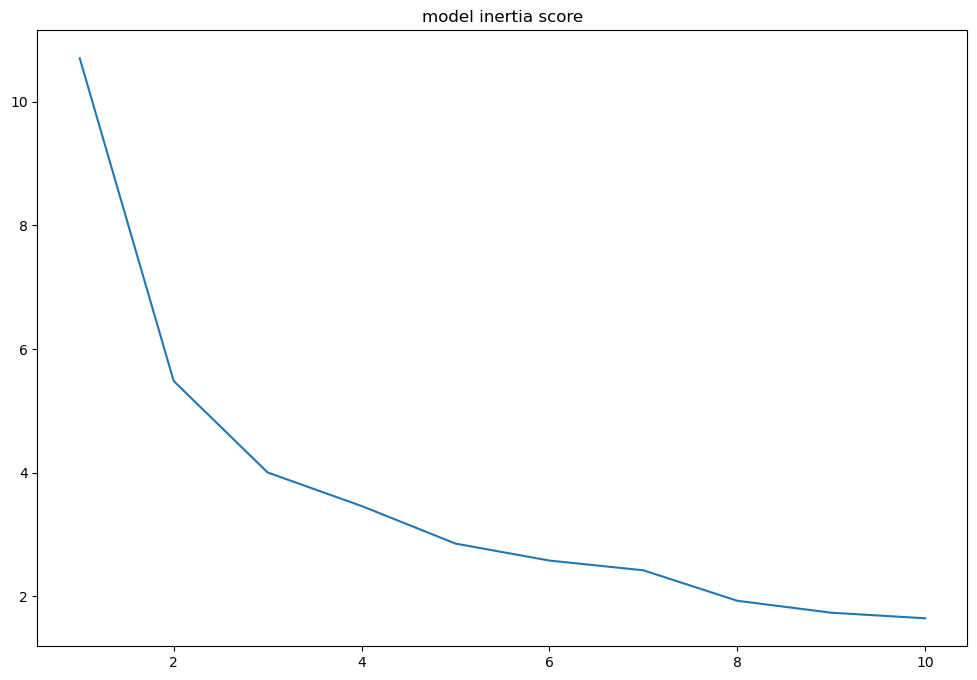

In [181]:
# build the subdataframe made of features we need
clustering_features= df_cleaned[['speechiness', 'danceability', 'tempo_normalized']]

# computes the inertia scores
inertia = []
for n in range(1,11):
    kmeans = KMeans(n_clusters = n, random_state=7)
    kmeans.fit(clustering_features)
    inertia.append(kmeans.inertia_)
inertia

# plot the result so it is easier to make the choice
plt.figure(figsize = (12,8))
plt.plot(range(1,11),inertia)
plt.title('model inertia score')

Here, according to the inertia scores, the preferable number of cluster to build seems to be 2. Howether because building 3 remains relevant and enable a deepeer analysis so I will go with 3.

4.3 Classification and data visualization

In [182]:
#creates the kmeans algorithm with 3 features and 3 clusters
kmeans = KMeans(n_clusters = 3, random_state=7)
df_cleaned['cluster'] = kmeans.fit_predict(clustering_features)
df_cleaned

/var/folders/xk/_lxyx6nn61b0nzyx5vp0p0ph0000gn/T/ipykernel_17271/2292808015.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,track_name,album,release_date,duration_ms,popularity,speechiness,danceability,tempo,lyrics,tempo_normalized,cluster
0,Growing Apart,Overly Dedicated,2010-09-14,220995,52,0.3660,0.586,106.835,Where are we going? Why are we slowing down?\n...,0.313343,0
1,Ignorance Is Bliss,Overly Dedicated,2010-09-14,210494,55,0.3870,0.644,82.156,Lord forgive me\nKill him where he stand and s...,0.114730,0
2,P&P 1.5,Overly Dedicated,2010-09-14,361942,54,0.3690,0.550,146.453,"Oh, what up ho? Oh, what up?\nI said, oh, what...",0.632182,1
3,Alien Girl,Overly Dedicated,2010-09-14,239973,51,0.0367,0.626,95.948,"She look better than Beyoncé, Alicia Keys, Hal...",0.225726,0
4,Opposites Attract,Overly Dedicated,2010-09-14,271909,53,0.4350,0.608,192.157,"Uh, yeah, uh, yeah\nUh, yeah, uh\nWe hurt peop...",1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
96,Mirror,Mr. Morale & The Big Steppers,2022-05-13,256006,67,0.0639,0.652,91.933,"The pressure's taking over me, it's beginning ...",0.193414,0
97,The Heart Part 5,Mr. Morale & The Big Steppers,2022-05-13,332228,65,0.2970,0.700,97.405,"As I get a little older, I realize life is per...",0.237451,0
98,euphoria,Diss Tracks,2024-04-30,383639,94,0.1100,0.831,139.948,​eurt si em tuoba yas yeht gnihtyrev\nE\nEupho...,0.579831,2
100,meet the grahams,Diss Tracks,2024-05-03,392138,87,0.3090,0.479,74.980,Dear Adonis\nI'm sorry that that man is your f...,0.056979,0


In [183]:
#creates a 3D scatter plot with the 3 new clusters
fig = px.scatter_3d(df_cleaned,x='speechiness',y='danceability',z= 'tempo_normalized',color= 'cluster',hover_data=['track_name','album'],title='Kendrick Lamar music Clustering in 3D')
fig.update_layout(title_x=0.5)
fig.show()

#see html : Kmeans_Clustering

Now let's try to understand this classification:
- CLUSTER 0 : low tempo, low danceablity, average speechiness
-> More jazzy and instrumental songs similar to balades like Money trees

- CLUSTER 1 : high tempo, low danceability, average speechiness
-> more concious, raw and pure rap song like Mr.Morale

- CLUSTER 2 : high danceability, avergae tempo, low speenchiness
-> more rythmic and energic song like Humble

4.4 Interpretation

This being done we can try to understand what type of music is doing Kendrick Lamar and get more information about the "color" of each album. First let's take a look at the place occupied by each cluster in each album.

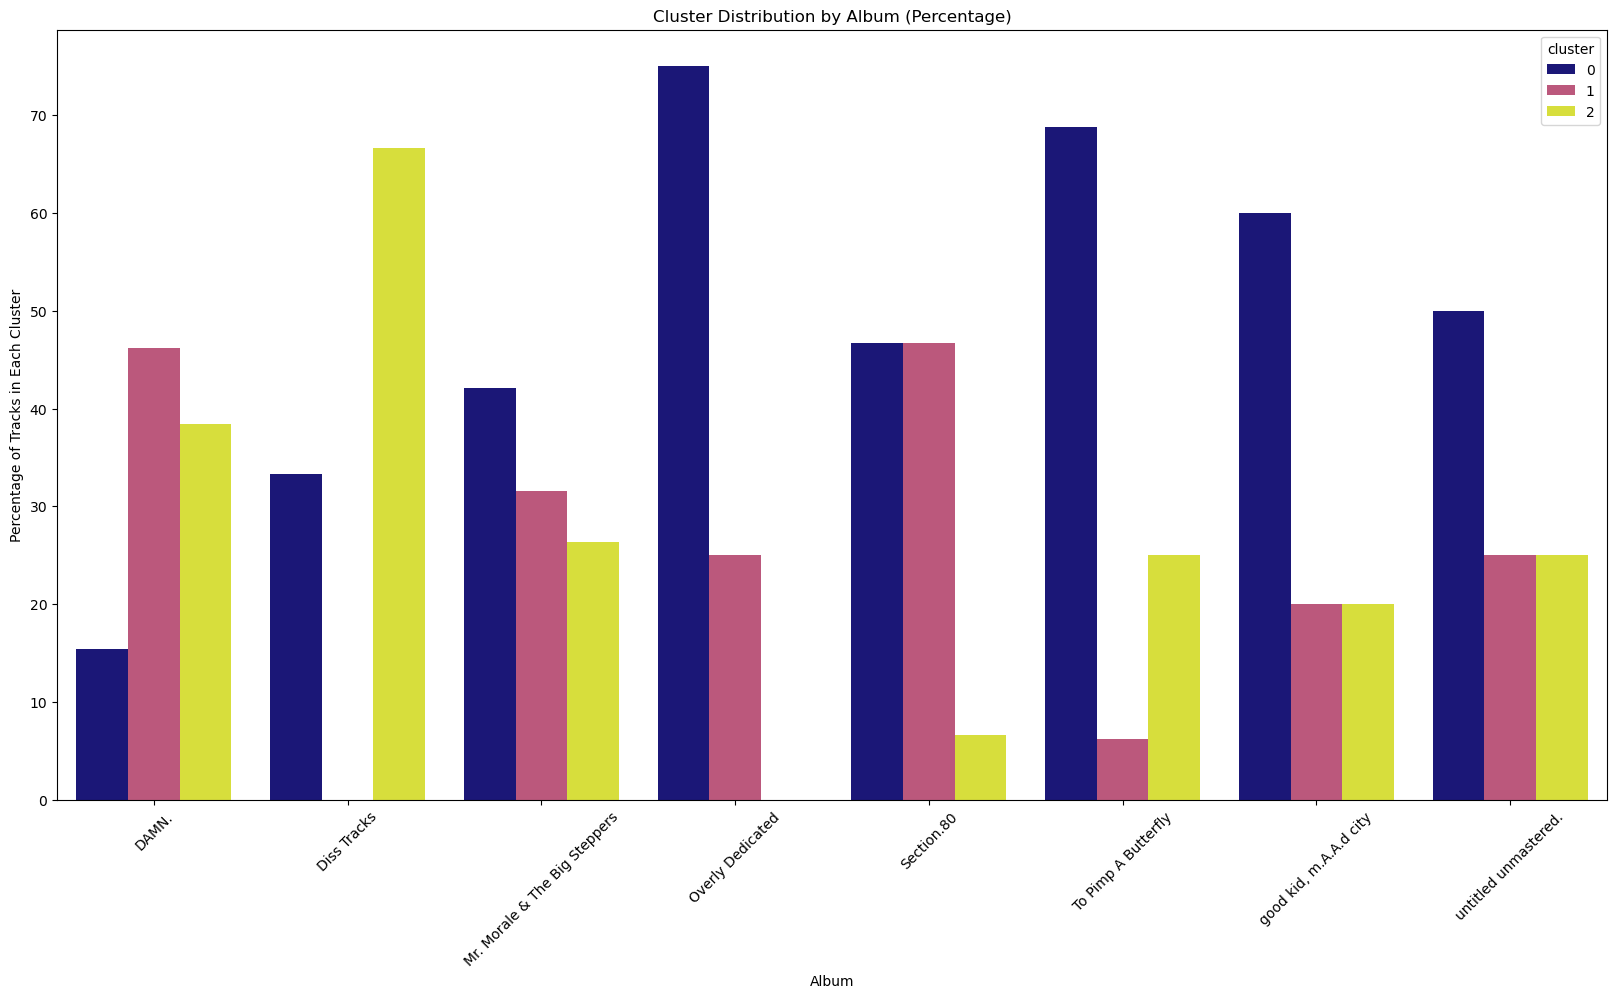

In [184]:
# Group by album and cluster to count the number of tracks in each cluster per album
cluster_distribution = df_cleaned.groupby(['album', 'cluster']).size().reset_index(name='count')

# Calculate the number of tracks per album
total_tracks_per_album = df_cleaned.groupby('album').size().reset_index(name='total_tracks')

# Merge the cluster distribution with total tracks per album
cluster_distribution = pd.merge(cluster_distribution, total_tracks_per_album, on='album')

# Calculate the percentage of tracks in each cluster for each album
cluster_distribution['percentage'] = (cluster_distribution['count'] / cluster_distribution['total_tracks']) * 100

# Plot the results 
plt.figure(figsize=(20, 10))
sns.barplot(data=cluster_distribution, x='album', y='percentage',hue='cluster', palette='plasma')
plt.xticks(rotation=45)

# Add a title and labels
plt.title('Cluster Distribution by Album (Percentage)')
plt.xlabel('Album')
plt.ylabel('Percentage of Tracks in Each Cluster')

plt.show()


Except his last album "Diss Tracks" with a monopol of energic songs logically corresponding to the "battle" mood All the albums are overall diversified.We can observe the predominancy of blue corresponding to the chill and instrumental songs that are hghly present in every album. Blue being followed by pink and the more "rap" and conscious songs.
However we can distinguish albums with a more singular color : 
- "Diss Tracks" with the proeminency of yellow:  energic songs which logically correspond to the "battle" mood with Drake
- "Overly dedicated" with the proeminency of blue : an introspective album that let place for emotions with a strong influence of Jazz and Soul : two genres with a relative low tempo 
- "Damn" with a dominance of Pink : an album that denounces racial discrimination with assertiveness and aggressivenes immersed in trap atmosphere.

Now it would be intersting to visualize how the music of Kendrick Lamars has evolved based on these clusters. To do so let's create an area chart with the proportion of clusters over time. I will not include here the "Diss track" album because as a stepside in the discography it is not a real one so not relevant in this analysis.

In [185]:
# Ensure 'release_date' is in datetime format
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce')

# Exclude the album 'Diss Tracks'
df_cleaned_filtered = df_cleaned[df_cleaned['album'] != 'Diss Tracks']

# measure calculation (same as before except we have 2 merging operation to access the release date)
cluster_distribution = df_cleaned_filtered.groupby(['album', 'cluster']).size().reset_index(name='count')
total_tracks_per_album = df_cleaned_filtered.groupby('album').size().reset_index(name='total_tracks')
cluster_distribution = pd.merge(cluster_distribution, total_tracks_per_album, on='album')
cluster_distribution = pd.merge(cluster_distribution, df_cleaned_filtered[['album', 'release_date']].drop_duplicates(), on='album')
cluster_distribution['percentage'] = (cluster_distribution['count'] / cluster_distribution['total_tracks']) * 100

# Sort by release_date to ensure the timeline is correct
cluster_distribution = cluster_distribution.sort_values(by='release_date')

# Plot the line chart
fig = px.line(cluster_distribution, x='release_date', y='percentage', color='cluster',
              line_shape='linear', title='Cluster Evolution Over Time (Release Date)',
              labels={'percentage': 'Percentage of Tracks in Each Cluster', 'release_date': 'Release Date'})

# area fill for each cluster
fig.update_traces(mode='lines+markers', fill='tozeroy')

# Show the plot
fig.update_layout(title_x=0.5)
fig.show()

# see html cluster_evolution


/var/folders/xk/_lxyx6nn61b0nzyx5vp0p0ph0000gn/T/ipykernel_17271/236703039.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



It is intersting to see here how the repartition of each cluster converges to 1/3. The albums of Kendrick Lamar seems to be more and more homogeneous over time. He seems to have found an equilibrium that satisfied every part of his audience which can explain how he became mainstream and succeeded to be futur-proof.

5. RECOMMANDATION SYSTEM

The recommandation system I will build is based on the previous K-mean classification. The idea is to recommand to the user the 3 songs that are the closest of the input track regarding the 3D map we build previously. To do so we will need to compute the euclidian disance between each point, Sort the result based on the input track and retrieves the top 3 titles.

In [186]:

def track_recommendation(name):
    
    recommendation = []
    
    # Extract the features of the input track and convert it into a 1D array
    a = df_cleaned.loc[df_cleaned['track_name'] == name, ['speechiness', 'danceability', 'tempo_normalized']].values.flatten()
    
    # Loop through all tracks in the dataset
    for track in df_cleaned['track_name']:
        # Extract the features of each track and convert it into a 1D array
        b = df_cleaned.loc[df_cleaned['track_name'] == track, ['speechiness', 'danceability', 'tempo_normalized']].values.flatten()
        
        # Calculate the Euclidean distance between the input track and the current track
        c = distance.euclidean(a, b)
        
        # Append the track name and the distance to the recommendation list
        recommendation.append([track, c])
    
    # Sort the list by distance (ascending order)
    recommendation.sort(key=lambda x: x[1])
    
    # Return the top 3 closest tracks, excluding the track itself (distance 0)
    return recommendation[1:4] 


In [187]:
print (track_recommendation('PRIDE.'))

[['GOD.', 0.06698823990179753], ['Bitch, Don’t Kill My Vibe', 0.095733350505983], ['The Recipe', 0.11839807876195285]]


The results are pretty coherent, the algorithm works well to find "similar songs"!

 However it remains very basic as it does not take into account many features of the songs (lyrics, accousticness... ) and has no cultural indicators based for example on the what are listening simlar users, the country of residence of the user or his listening habits